In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# load the data
A = np.load('A.npy')
b = np.load('b.npy').reshape(500, 1)
x_star = np.load('x_star.npy')

# define the function to calculate the subgradient
def subgradient(f, x):
    l = np.sign(A @ x - b)
    zeros = np.where(l == 0)
    zeros_num = zeros[0].size
    random_values = np.random.choice([-1, 1], size= zeros_num)
    l[zeros] = random_values
    
    return A.T @ l

# define the function to calculate the optimality gap
def optimality_gap(x, x_star):
    return np.linalg.norm(x.reshape(x_star.shape) - x_star)

# learning rate strategies
def constant_lr(mu):
    return lambda k: mu

def polynomial_diminishing_lr(mu):
    return lambda k: mu / np.sqrt(k+ 1)

def geometrically_diminishing_lr(mu, gamma=0.9):
    return lambda k: mu * gamma ** k

In [68]:
# initialize the x vector
x = np.zeros(shape = (A.shape[1], 1))

# initialize lists to store the optimality gaps
gaps_constant = []
gaps_polynomial = []
gaps_geometric = []

K = 300
x_con = x
x_poly = x
x_geo = x

In [69]:
# implement the subgradient method with different learning rates
for k in range(K):
    # constant learning rate
    mu_k_constant = constant_lr(0.005)(k)
    g_constant = subgradient(None, x_con)
    x_con -= mu_k_constant * g_constant
    x_con = np.clip(x_con, -1e10, 1e10)  
    gaps_constant.append(optimality_gap(x_con, x_star))
    
    # polynomial diminishing learning rate
    mu_k_polynomial = polynomial_diminishing_lr(0.03)(k)
    g_polynomial = subgradient(None, x_poly)
    x_poly -= mu_k_polynomial * g_polynomial
    x_poly = np.clip(x_poly, -1e10, 1e10)  
    gaps_polynomial.append(optimality_gap(x_poly, x_star))
    
    # geometrically diminishing learning rate
    mu_k_geometric = geometrically_diminishing_lr(0.01)(k)
    g_geometric = subgradient(None, x_geo)
    x_geo -= mu_k_geometric * g_geometric
    x_geo = np.clip(x_geo, -1e10, 1e10)  
    gaps_geometric.append(optimality_gap(x_geo, x_star))

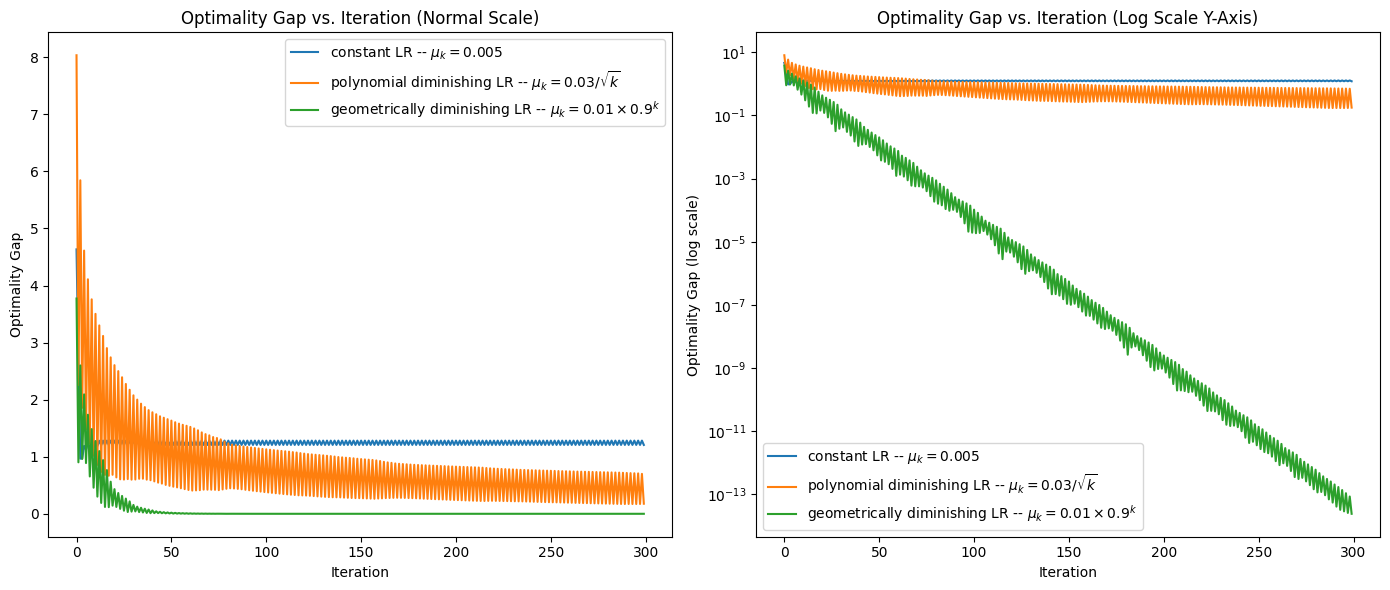

In [79]:
# plot the optimality gaps
plt.figure(figsize=(14, 6))

# plot with normal scale for both axes
plt.subplot(1, 2, 1)
plt.plot(gaps_constant, label='constant LR -- $\\mu_k = 0.005$')
plt.plot(gaps_polynomial, label='polynomial diminishing LR -- $\\mu_k = 0.03 / \sqrt{k}$')
plt.plot(gaps_geometric, label='geometrically diminishing LR -- $\\mu_k = 0.01 \\times 0.9^k$')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap')
plt.legend()
plt.title('Optimality Gap vs. Iteration (Normal Scale)')

# plot with normal scale for x-axis and log scale for y-axis
plt.subplot(1, 2, 2)
plt.plot(gaps_constant, label='constant LR -- $\\mu_k = 0.005$')
plt.plot(gaps_polynomial, label='polynomial diminishing LR -- $\\mu_k = 0.03 / \sqrt{k}$')
plt.plot(gaps_geometric, label='geometrically diminishing LR -- $\\mu_k = 0.01 \\times 0.9^k$')
plt.xlabel('Iteration')
plt.ylabel('Optimality Gap (log scale)')
plt.yscale('log')
plt.legend()
plt.title('Optimality Gap vs. Iteration (Log Scale Y-Axis)')

plt.tight_layout()
plt.show()